In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

import yaml

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from  plotly import colors

import pandas as pd

from arsenic import plotting, stats

from svgutils import transform as sg

from IPython.core.display import HTML
from scipy.stats import norm

from PLBenchmarks import targets, ligands, edges

from tqdm.notebook import tqdm
import pint
unit_registry = pint.UnitRegistry()

from ipywidgets import widgets, interact

import benchmarkpl
path = benchmarkpl.__path__[0]
targets.set_data_dir(path)

In [2]:
all_edges = pd.read_csv('../03_comparison_experiment/03a_all_edges_all_ffs.csv', index_col=0)
all_edges.head()

target                  edge  ligandA  ligandB  \
jnk1_edge_17124-1_18631-1   jnk1  edge_17124-1_18631-1  17124-1  18631-1   
jnk1_edge_17124-1_18634-1   jnk1  edge_17124-1_18634-1  17124-1  18634-1   
jnk1_edge_18626-1_18624-1   jnk1  edge_18626-1_18624-1  18626-1  18624-1   
jnk1_edge_18626-1_18625-1   jnk1  edge_18626-1_18625-1  18626-1  18625-1   
jnk1_edge_18626-1_18627-1   jnk1  edge_18626-1_18627-1  18626-1  18627-1   

                                          unit  DDG_Exp.  dDDG_Exp.  \
jnk1_edge_17124-1_18631-1  kilocalories / mole      0.26       0.37   
jnk1_edge_17124-1_18634-1  kilocalories / mole     -0.33       0.29   
jnk1_edge_18626-1_18624-1  kilocalories / mole      0.38       0.21   
jnk1_edge_18626-1_18625-1  kilocalories / mole      0.77       0.21   
jnk1_edge_18626-1_18627-1  kilocalories / mole      0.39       0.22   

                           DDG_OpenFF-1.0  dDDG_OpenFF-1.0  \
jnk1_edge_17124-1_18631-1        1.190000         0.096086   
jnk1_edge_17124-1_18634-1        0.580000         0.128639   
jnk1_edge_18626-1_18624-1        0.556667         0.099301   
jnk1_edge_18626-1_18625-1       -0.030000         0.107462   
jnk1_edge_18626-1_18627-1        0.140000         0.046151   

                           DDG_OpenFF-1.0_converged  ...  error_GAFF2  \
jnk1_edge_17124-1_18631-1                  1.190000  ...     1.071262   
jnk1_edge_17124-1_18634-1                  0.580000  ...     0.829522   
jnk1_edge_18626-1_18624-1                  0.556667  ...     0.745717   
jnk1_edge_18626-1_18625-1                 -0.030000  ...    -0.062543   
jnk1_edge_18626-1_18627-1                  0.140000  ...     0.042600   

                           abserror_GAFF2  error_cGenFF  abserror_cGenFF  \
jnk1_edge_17124-1_18631-1        1.071262      0.516769         0.516769   
jnk1_edge_17124-1_18634-1        0.829522      0.580956         0.580956   
jnk1_edge_18626-1_18624-1        0.745717     -0.265277         0.265277   
jnk1_edge_18626-1_18625-1        0.062543     -0.294379         0.294379   
jnk1_edge_18626-1_18627-1        0.042600     -0.232256         0.232256   

                           error_Consensus_OpenFF_GAFF2_cGenFF  \
jnk1_edge_17124-1_18631-1                             0.646112   
jnk1_edge_17124-1_18634-1                             0.852556   
jnk1_edge_18626-1_18624-1                             0.309516   
jnk1_edge_18626-1_18625-1                            -0.388337   
jnk1_edge_18626-1_18627-1                            -0.020344   

                           abserror_Consensus_OpenFF_GAFF2_cGenFF  \
jnk1_edge_17124-1_18631-1                                0.646112   
jnk1_edge_17124-1_18634-1                                0.852556   
jnk1_edge_18626-1_18624-1                                0.309516   
jnk1_edge_18626-1_18625-1                                0.388337   
jnk1_edge_18626-1_18627-1                                0.020344   

                           error_Consensus_OpenFF_GAFF2  \
jnk1_edge_17124-1_18631-1                      0.784876   
jnk1_edge_17124-1_18634-1                      0.928604   
jnk1_edge_18626-1_18624-1                      0.616033   
jnk1_edge_18626-1_18625-1                     -0.155679   
jnk1_edge_18626-1_18627-1                      0.064101   

                           abserror_Consensus_OpenFF_GAFF2  \
jnk1_edge_17124-1_18631-1                         0.784876   
jnk1_edge_17124-1_18634-1                         0.928604   
jnk1_edge_18626-1_18624-1                         0.616033   
jnk1_edge_18626-1_18625-1                         0.155679   
jnk1_edge_18626-1_18627-1                         0.064101   

                           error_Consensus_all  abserror_Consensus_all  
jnk1_edge_17124-1_18631-1             1.222263                1.222263  
jnk1_edge_17124-1_18634-1             0.798413                0.798413  
jnk1_edge_18626-1_18624-1             0.446727                0.446727  
jnk1_edge_18626-1_18625-1             0.1

In [3]:
identifiers = [idx[4:] for idx in all_edges.columns if idx.startswith("DDG")]
identifiers

['Exp.',
 'OpenFF-1.0',
 'OpenFF-1.0_converged',
 'OpenFF-1.2',
 'OpenFF-1.2_converged',
 'OpenFF-2.0',
 'OpenFF-2.0_converged',
 'OPLS3e',
 'GAFF2',
 'cGenFF',
 'Consensus_OpenFF_GAFF2_cGenFF',
 'Consensus_OpenFF_GAFF2',
 'Consensus_all']

In [4]:
fig = go.Figure(
)
for idx in ['OpenFF-1.0', 'OpenFF-2.0', 'GAFF2', 'cGenFF', 'OPLS3e', 'Consensus_all']:
#     print(r.loc[[c for c in r.columns if c in targets.target_dict]].values)
    fig.add_trace(go.Scatter(
        y= all_edges[f'abserror_{idx}'],
        x=np.fabs(all_edges[f'DDG_{idx}']),
        name=idx,
        mode='markers'
#         marker_color='#3D9970'
        ))
fig.update_layout(
    xaxis_title='DDG Threshold [kcal/mol]',
    yaxis_title='Fraction of Edges < Threshold [%]',
    boxmode='group' # group together boxes of the different traces for each value of x
)
#fig.write_image(f'outlier_ratio_all_box.png')
fig.show()

In [5]:
fig = go.Figure(
)
for idx in ['OpenFF-1.0', 'OpenFF-2.0', 'GAFF2', 'cGenFF', 'OPLS3e', 'Consensus_all']:
    xx = []
    yy = []
    for i in np.linspace(0, 24, 25):
        x = all_edges.loc[(all_edges[f'DDG_{idx}']>i) & (all_edges[f'DDG_{idx}']<i+1.)]
        xx.append(i+0.5)
        yy.append(np.mean(x[f'abserror_{idx}']))
#     print(r.loc[[c for c in r.columns if c in targets.target_dict]].values)
    fig.add_trace(go.Bar(
            y= yy,
            x=xx,
            name=idx,
#         marker_color='#3D9970'
            ))
fig.update_layout(
    xaxis_title='calc. DDG [kcal/mol]',
    yaxis_title='avg. Error',
    boxmode='group' # group together boxes of the different traces for each value of x
)
#fig.write_image(f'outlier_ratio_all_box.png')
fig.show()

In [6]:
fig = go.Figure(
)
for idx in ['OpenFF-1.0', 'OpenFF-2.0', 'GAFF2', 'cGenFF', 'OPLS3e', 'Consensus_all']:
    xx = []
    yy = []
    for i in np.linspace(0, 24, 25):
        x = all_edges.loc[(all_edges[f'DDG_Exp.']>i) & (all_edges[f'DDG_Exp.']<i+1.)]
        xx.append(i+0.5)
        yy.append(np.mean(x[f'abserror_{idx}']))
#     print(r.loc[[c for c in r.columns if c in targets.target_dict]].values)
    fig.add_trace(go.Bar(
            y= yy,
            x=xx,
            name=idx,
#         marker_color='#3D9970'
            ))
fig.update_layout(
    xaxis_title='exp. DDG [kcal/mol]',
    yaxis_title='avg. Error',
    boxmode='group' # group together boxes of the different traces for each value of x
)
#fig.write_image(f'outlier_ratio_all_box.png')
fig.show()

In [7]:
for ff, file in zip([
        "OpenFF-1.0",
        "GAFF2",
        "cGenFF",
    ],
    [
        "../01_inspect/01b_finished_simulations_openff-1.0.0.offxml.csv",
        "../01_inspect/01b_finished_simulations_gaff.csv",
        "../01_inspect/01b_finished_simulations_cgenff.csv",
    ]
    ):
    all_sims_finished = pd.read_csv(file)
    for i, row in all_sims_finished.iterrows():
        target = row['target']
        edge = row['edge']
        sim_data = all_sims_finished.loc[(all_sims_finished['target']==target) & (all_sims_finished['edge'] == edge)]
        all_edges.loc[f'{target}_{edge}', f'aerr_{ff}'] = np.mean(sim_data["aerr"])
        all_edges.loc[f'{target}_{edge}', f'conv_{ff}'] = np.mean(sim_data["conv"])
  
ff = "OpenFF-2.0"
all_sims_finished = pd.concat([
    pd.read_csv("../01_inspect/01b_finished_simulations_openff-2.0.0-rc.1.offxml.csv"),
    pd.read_csv("../01_inspect/01b_finished_simulations_openff-2.0.0.offxml.csv")        
]
)
for i, row in all_sims_finished.iterrows():
    target = row['target']
    edge = row['edge']
    sim_data = all_sims_finished.loc[(all_sims_finished['target']==target) & (all_sims_finished['edge'] == edge)]
    all_edges.loc[f'{target}_{edge}', f'aerr_{ff}'] = np.mean(sim_data["aerr"])
    all_edges.loc[f'{target}_{edge}', f'conv_{ff}'] = np.mean(sim_data["conv"])

for ff in ['OPLS3e', 'Consensus_OpenFF_GAFF2_cGenFF','Consensus_OpenFF_GAFF2', 'Consensus_all']:
    for i, row in all_edges.iterrows():
        all_edges.loc[i, f'aerr_{ff}'] = 0.0
        all_edges.loc[i, f'conv_{ff}'] = 0.0
        
all_sims_finished

Unnamed: 0    val   err     aerr  conv      env  repeat target  \
0              0  24.27  0.64  4389.82  1.00  complex       1   cmet   
1              1 -27.06  0.27     0.34  0.24  complex       1   cmet   
2              2  -3.51  0.25     0.25  0.04  complex       1   cmet   
3              3  27.96  1.19     6.26  0.99  complex       1   cmet   
4              4  -2.35  0.19     0.26  0.32  complex       1   cmet   
...          ...    ...   ...      ...   ...      ...     ...    ...   
3438        3457 -23.57  0.53     0.45 -0.10    water       3  pde10   
3439        3458  54.35  0.08     0.08  0.05    water       3  pde10   
3440        3459  51.89  0.08     0.08  0.09    water       3  pde10   
3441        3460  19.18  0.22     0.25  0.05    water       3  pde10   
3442        3461 -82.09  0.08     0.09  0.03    water       3  pde10   

                                          edge  failed  
0     edge_CHEMBL3402741_400_CHEMBL3402756_2.7   False  
1      edge_CHEMBL3402741_400_CHEMBL3402763_90   False  
2      edge_CHEMBL3402741_400_CHEMBL3402764_90   False  
3      edge_CHEMBL3402742_23_CHEMBL3402756_2.7   False  
4       edge_CHEMBL3402742_23_CHEMBL3402763_90   False  
...                                        ...     ...  
3438                            edge_1801_4147   False  
3439                            edge_2750_5973   False  
3440                            edge_8041_1939   False  
3441                            edge_0340_0738   False  
3442                            edge_3032_8041   False  

[6749 rows x 10 columns]

In [8]:
lomap = pd.read_csv("../01_inspect/lomap_scores.csv", index_col=0)
lomap.index=lomap["id"]
for i, row in all_edges.iterrows():
    try:
        all_edges.loc[i, "lomap"] = lomap.loc[i, "lomap_score"]
    except:
        print(i)
lomap.head()

cmet_edge_CHEMBL3402741_400_CHEMBL3402756_2.7
cmet_edge_CHEMBL3402742_23_CHEMBL3402756_2.7
cmet_edge_CHEMBL3402743_42_CHEMBL3402756_2.7
cmet_edge_CHEMBL3402744_300_4_CHEMBL3402756_2.7
cmet_edge_CHEMBL3402744_300_4_CHEMBL3402757_6.5
cmet_edge_CHEMBL3402745_200_5_CHEMBL3402756_2.7
cmet_edge_CHEMBL3402757_6.5_CHEMBL3402756_2.7
cmet_edge_CHEMBL3402758_10_CHEMBL3402756_2.7
cmet_edge_CHEMBL3402759_5.7_CHEMBL3402757_6.5
cmet_edge_CHEMBL3402759_5.7_CHEMBL3402758_10
cmet_edge_CHEMBL3402759_5.7_CHEMBL3402763_90
cmet_edge_CHEMBL3402765_11-charged-pKa-8.1_CHEMBL3402742_23
cmet_edge_CHEMBL3402765_11-charged-pKa-8.1_CHEMBL3402743_42
cmet_edge_CHEMBL3402765_11-charged-pKa-8.1_CHEMBL3402744_300_4
cmet_edge_CHEMBL3402765_11-charged-pKa-8.1_CHEMBL3402745_200_5
cmet_edge_CHEMBL3402765_11-charged-pKa-8.1_CHEMBL3402760_1
cmet_edge_CHEMBL3402765_11-charged-pKa-8.1_CHEMBL3402764_90
ros1_edge_0529_6770
ros1_edge_0681_1537
ros1_edge_0681_1872
ros1_edge_0681_5109
ros1_edge_0681_6770
ros1_edge_0681_7454
ros1_edg

id     ligand_a  \
id                                                                  
jnk1_edge_17124-1_18634-1  jnk1_edge_17124-1_18634-1  lig_17124-1   
jnk1_edge_18626-1_18624-1  jnk1_edge_18626-1_18624-1  lig_18626-1   
jnk1_edge_18636-1_18625-1  jnk1_edge_18636-1_18625-1  lig_18636-1   
jnk1_edge_18632-1_18624-1  jnk1_edge_18632-1_18624-1  lig_18632-1   
jnk1_edge_18635-1_18625-1  jnk1_edge_18635-1_18625-1  lig_18635-1   

                              ligand_b  lomap_score  
id                                                   
jnk1_edge_17124-1_18634-1  lig_18634-1     0.904837  
jnk1_edge_18626-1_18624-1  lig_18624-1     0.904837  
jnk1_edge_18636-1_18625-1  lig_18625-1     0.891366  
jnk1_edge_18632-1_18624-1  lig_18624-1     0.818731  
jnk1_edge_18635-1_18625-1  lig_18625-1     0.860708

In [9]:
perturbation_information = pd.read_csv("../01_inspect/01c_perturbation_information.csv", index_col=0)
# perturbation_information.index=perturbation_information["id"]
for i, row in all_edges.iterrows():
    try:
        all_edges.loc[i, "HvyAtoms"] = perturbation_information.loc[i, "D_heavy_atoms"]
    except:
        print(i)
perturbation_information.head()

ligandA  ligandB  D_mol_weight  D_rot_bonds  \
jnk1_edge_17124-1_18631-1  17124-1  18631-1    107.921077          2.0   
jnk1_edge_17124-1_18634-1  17124-1  18634-1     77.910512          0.0   
jnk1_edge_18626-1_18624-1  18626-1  18624-1     33.961028          0.0   
jnk1_edge_18626-1_18625-1  18626-1  18625-1      0.000000          0.0   
jnk1_edge_18626-1_18627-1  18626-1  18627-1      0.000000          0.0   

                           D_rings  D_heavy_atoms  D_atoms  D_charge  \
jnk1_edge_17124-1_18631-1      0.0            3.0      4.0       0.0   
jnk1_edge_17124-1_18634-1      0.0            1.0      0.0       0.0   
jnk1_edge_18626-1_18624-1      0.0            1.0      0.0       0.0   
jnk1_edge_18626-1_18625-1      0.0            0.0      0.0       0.0   
jnk1_edge_18626-1_18627-1      0.0            0.0      0.0       0.0   

                              charge  
jnk1_edge_17124-1_18631-1  no_charge  
jnk1_edge_17124-1_18634-1  no_charge  
jnk1_edge_18626-1_18624-1  no_charge  
jnk1_edge_18626-1_18625-1  no_charge  
jnk1_edge_18626-1_18627-1  no_charge

In [10]:
all_edges.head()

target                  edge  ligandA  ligandB  \
jnk1_edge_17124-1_18631-1   jnk1  edge_17124-1_18631-1  17124-1  18631-1   
jnk1_edge_17124-1_18634-1   jnk1  edge_17124-1_18634-1  17124-1  18634-1   
jnk1_edge_18626-1_18624-1   jnk1  edge_18626-1_18624-1  18626-1  18624-1   
jnk1_edge_18626-1_18625-1   jnk1  edge_18626-1_18625-1  18626-1  18625-1   
jnk1_edge_18626-1_18627-1   jnk1  edge_18626-1_18627-1  18626-1  18627-1   

                                          unit  DDG_Exp.  dDDG_Exp.  \
jnk1_edge_17124-1_18631-1  kilocalories / mole      0.26       0.37   
jnk1_edge_17124-1_18634-1  kilocalories / mole     -0.33       0.29   
jnk1_edge_18626-1_18624-1  kilocalories / mole      0.38       0.21   
jnk1_edge_18626-1_18625-1  kilocalories / mole      0.77       0.21   
jnk1_edge_18626-1_18627-1  kilocalories / mole      0.39       0.22   

                           DDG_OpenFF-1.0  dDDG_OpenFF-1.0  \
jnk1_edge_17124-1_18631-1        1.190000         0.096086   
jnk1_edge_17124-1_18634-1        0.580000         0.128639   
jnk1_edge_18626-1_18624-1        0.556667         0.099301   
jnk1_edge_18626-1_18625-1       -0.030000         0.107462   
jnk1_edge_18626-1_18627-1        0.140000         0.046151   

                           DDG_OpenFF-1.0_converged  ...  aerr_OPLS3e  \
jnk1_edge_17124-1_18631-1                  1.190000  ...          0.0   
jnk1_edge_17124-1_18634-1                  0.580000  ...          0.0   
jnk1_edge_18626-1_18624-1                  0.556667  ...          0.0   
jnk1_edge_18626-1_18625-1                 -0.030000  ...          0.0   
jnk1_edge_18626-1_18627-1                  0.140000  ...          0.0   

                           conv_OPLS3e  aerr_Consensus_OpenFF_GAFF2_cGenFF  \
jnk1_edge_17124-1_18631-1          0.0                                 0.0   
jnk1_edge_17124-1_18634-1          0.0                                 0.0   
jnk1_edge_18626-1_18624-1          0.0                                 0.0   
jnk1_edge_18626-1_18625-1          0.0                                 0.0   
jnk1_edge_18626-1_18627-1          0.0                                 0.0   

                           conv_Consensus_OpenFF_GAFF2_cGenFF  \
jnk1_edge_17124-1_18631-1                                 0.0   
jnk1_edge_17124-1_18634-1                                 0.0   
jnk1_edge_18626-1_18624-1                                 0.0   
jnk1_edge_18626-1_18625-1                                 0.0   
jnk1_edge_18626-1_18627-1                                 0.0   

                           aerr_Consensus_OpenFF_GAFF2  \
jnk1_edge_17124-1_18631-1                          0.0   
jnk1_edge_17124-1_18634-1                          0.0   
jnk1_edge_18626-1_18624-1                          0.0   
jnk1_edge_18626-1_18625-1                          0.0   
jnk1_edge_18626-1_18627-1                          0.0   

                           conv_Consensus_OpenFF_GAFF2  aerr_Consensus_all  \
jnk1_edge_17124-1_18631-1                          0.0                 0.0   
jnk1_edge_17124-1_18634-1                          0.0                 0.0   
jnk1_edge_18626-1_18624-1                          0.0                 0.0   
jnk1_edge_18626-1_18625-1                          0.0                 0.0   
jnk1_edge_18626-1_18627-1                          0.0                 0.0   

                           conv_Consensus_all     lomap  HvyAtoms  
jnk1_edge_17124-1_18631-1                 0.0  0.740818       3.0  
jnk1_edge_17124-1_18634-1                 0.0  0.904837       1.0  
jnk1_edge_18626-1_18624-1                 0.0  0.904837       1.0  
jnk1_edge_18626-1_18625-1                 0.0  0.818731       0.0  
jnk1_edge_18626-1_18627-1                 0.0  0.818731       0.0  

[5 rows x 73 columns]

In [11]:
l = []
for i, row in all_edges.iterrows():
    for idx in ['OpenFF-1.0', 'OpenFF-2.0', 'GAFF2', 'cGenFF', 'OPLS3e', 'Consensus_OpenFF_GAFF2_cGenFF','Consensus_OpenFF_GAFF2', 'Consensus_all']:
        d = dict()
        d["Forcefield"] = idx
        if row[f'DDG_Exp.'] < 0.0:
            d["DDG_Exp."] = -row["DDG_Exp."] 
        else:
            d["DDG_Exp."] = row["DDG_Exp."] 
        if row[f'DDG_{idx}'] < 0.0:
            d["DDG_Calc."] = -row[f"DDG_{idx}"] 
        else:
            d["DDG_Calc."] = row[f"DDG_{idx}"] 

        for label, var in zip([
                    f"AE",
                    f"Conv",
                    "HvyAtoms",
                    "LOMAP"
               ],
                       [
                    f"abserror_{idx}",
                    f"conv_{idx}",
                    "HvyAtoms",
                    "lomap"
               ]):
            d[label]=row[var]
            
        
        l.append(d)
new_df = pd.DataFrame(l)
new_df.head()

Forcefield  DDG_Exp.  DDG_Calc.        AE   Conv  HvyAtoms     LOMAP
0  OpenFF-1.0      0.26   1.190000  0.930000 -0.085       3.0  0.740818
1  OpenFF-2.0      0.26   2.303333  2.043333  0.020       3.0  0.740818
2       GAFF2      0.26   1.331262  1.071262    NaN       3.0  0.740818
3      cGenFF      0.26   0.776769  0.516769    NaN       3.0  0.740818
4      OPLS3e      0.26   1.517686  1.257686  0.000       3.0  0.740818

In [12]:
labels = [r'$|\Delta \Delta G_{\mathrm{exp}}|$',
          r'$|\Delta \Delta G_{\mathrm{pred}}|$',
          r'$|\Delta \Delta G_{\mathrm{pred}}-\Delta \Delta G_{\mathrm{exp}}|$',
        #  r'$\epsilon_{a}$',
          r'$\alpha$',
          r'$\Delta\mathrm{HAC}$'
         ]

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



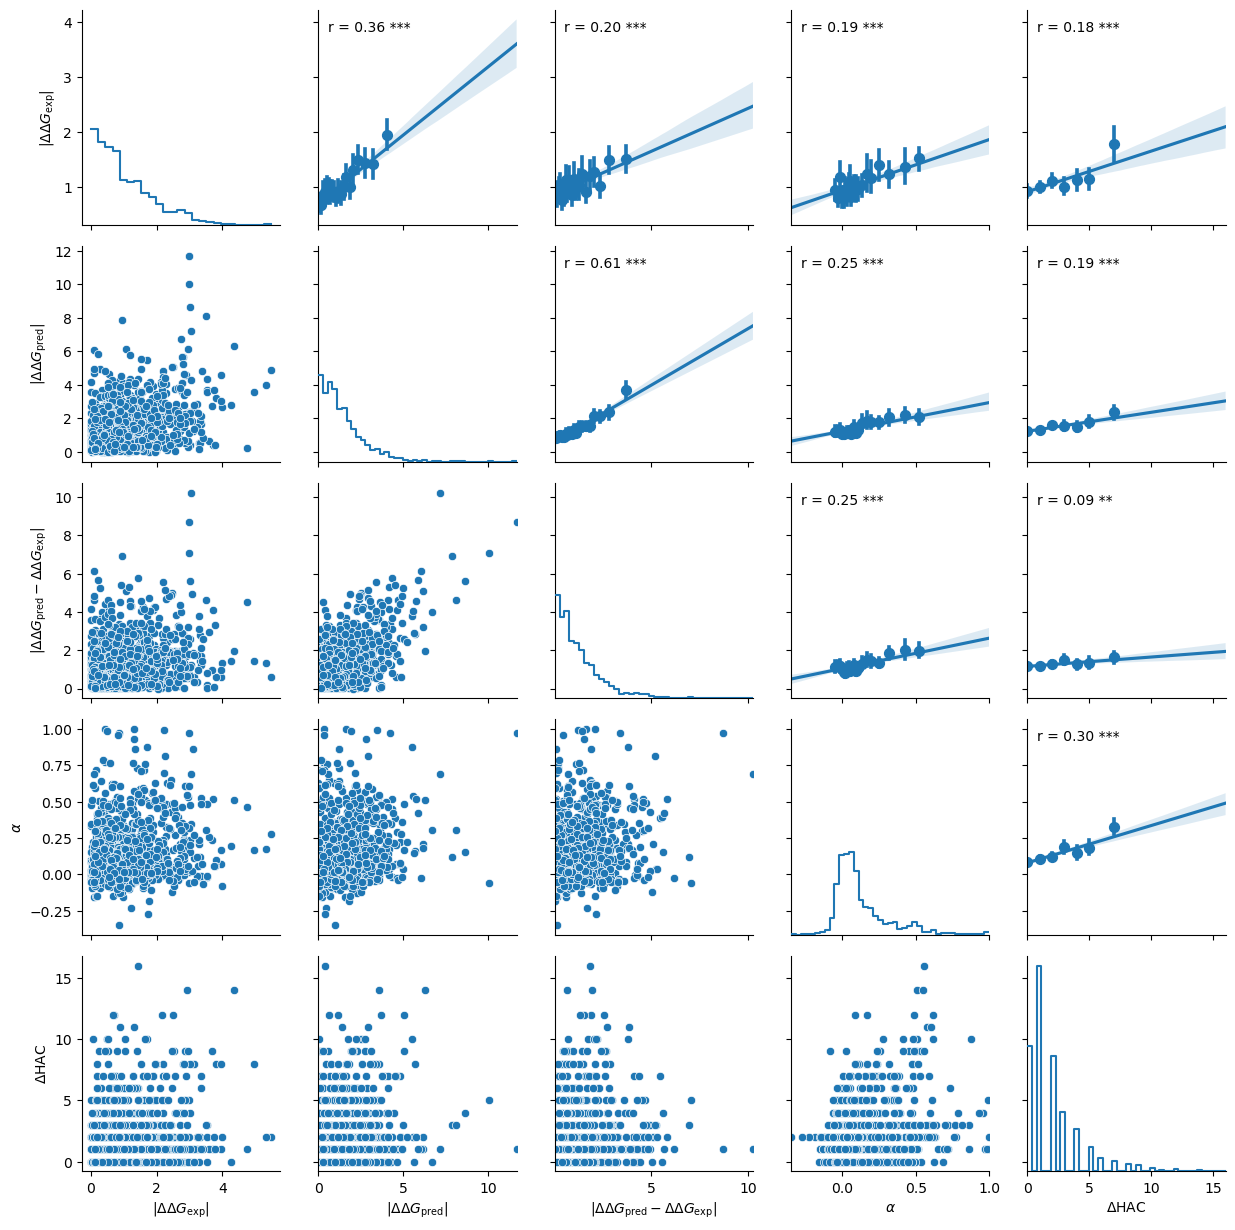

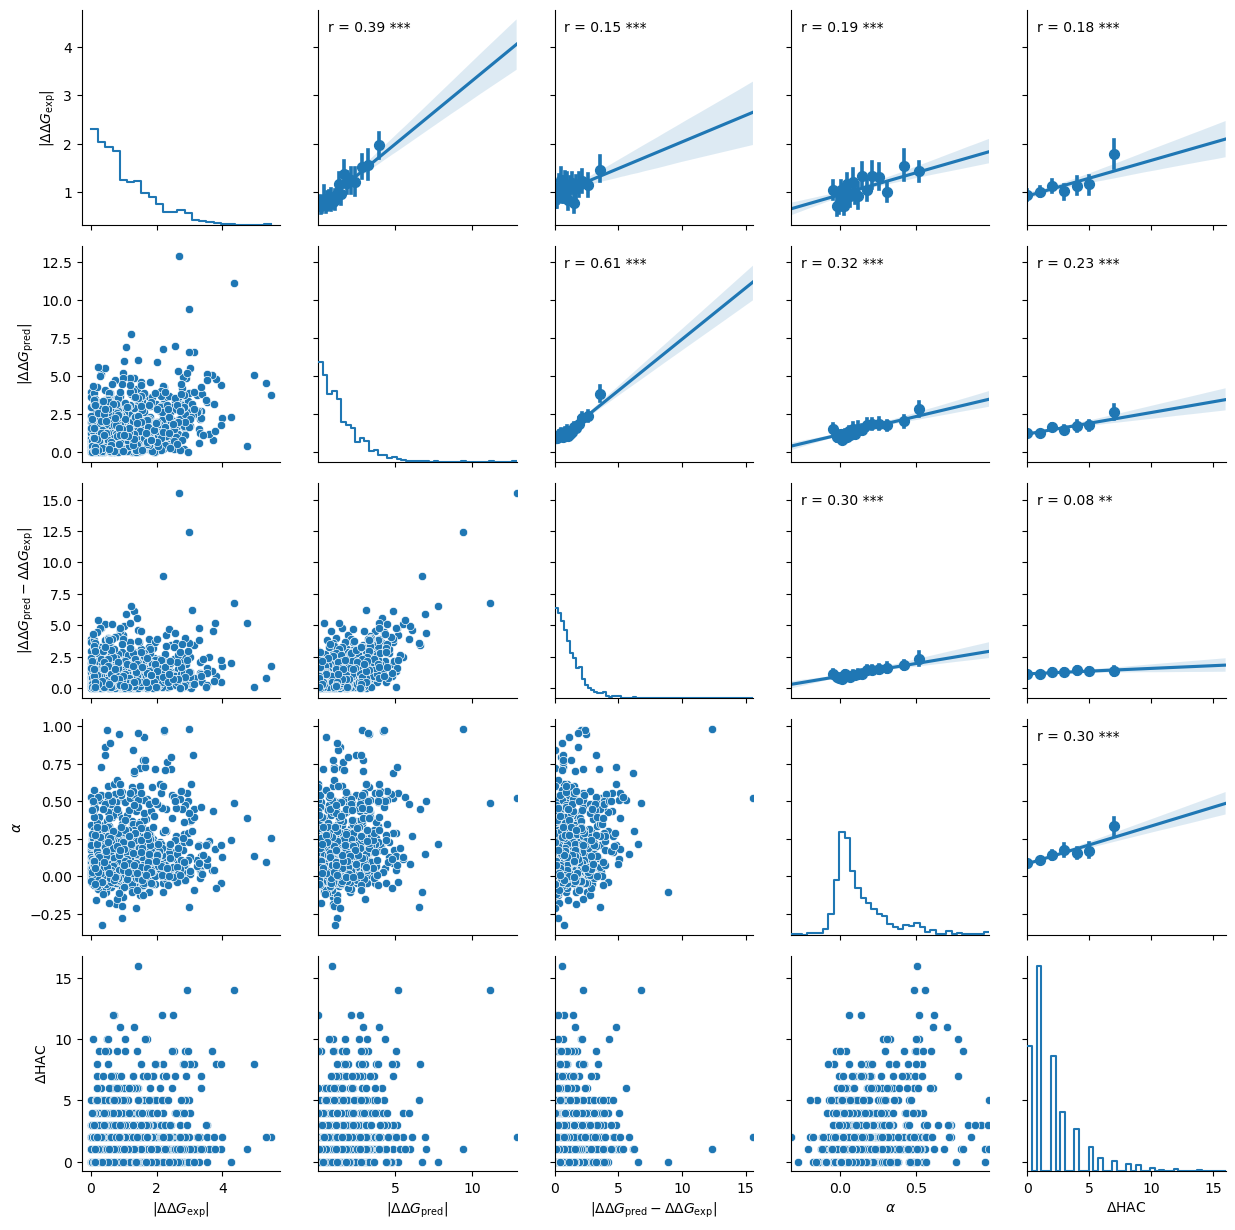

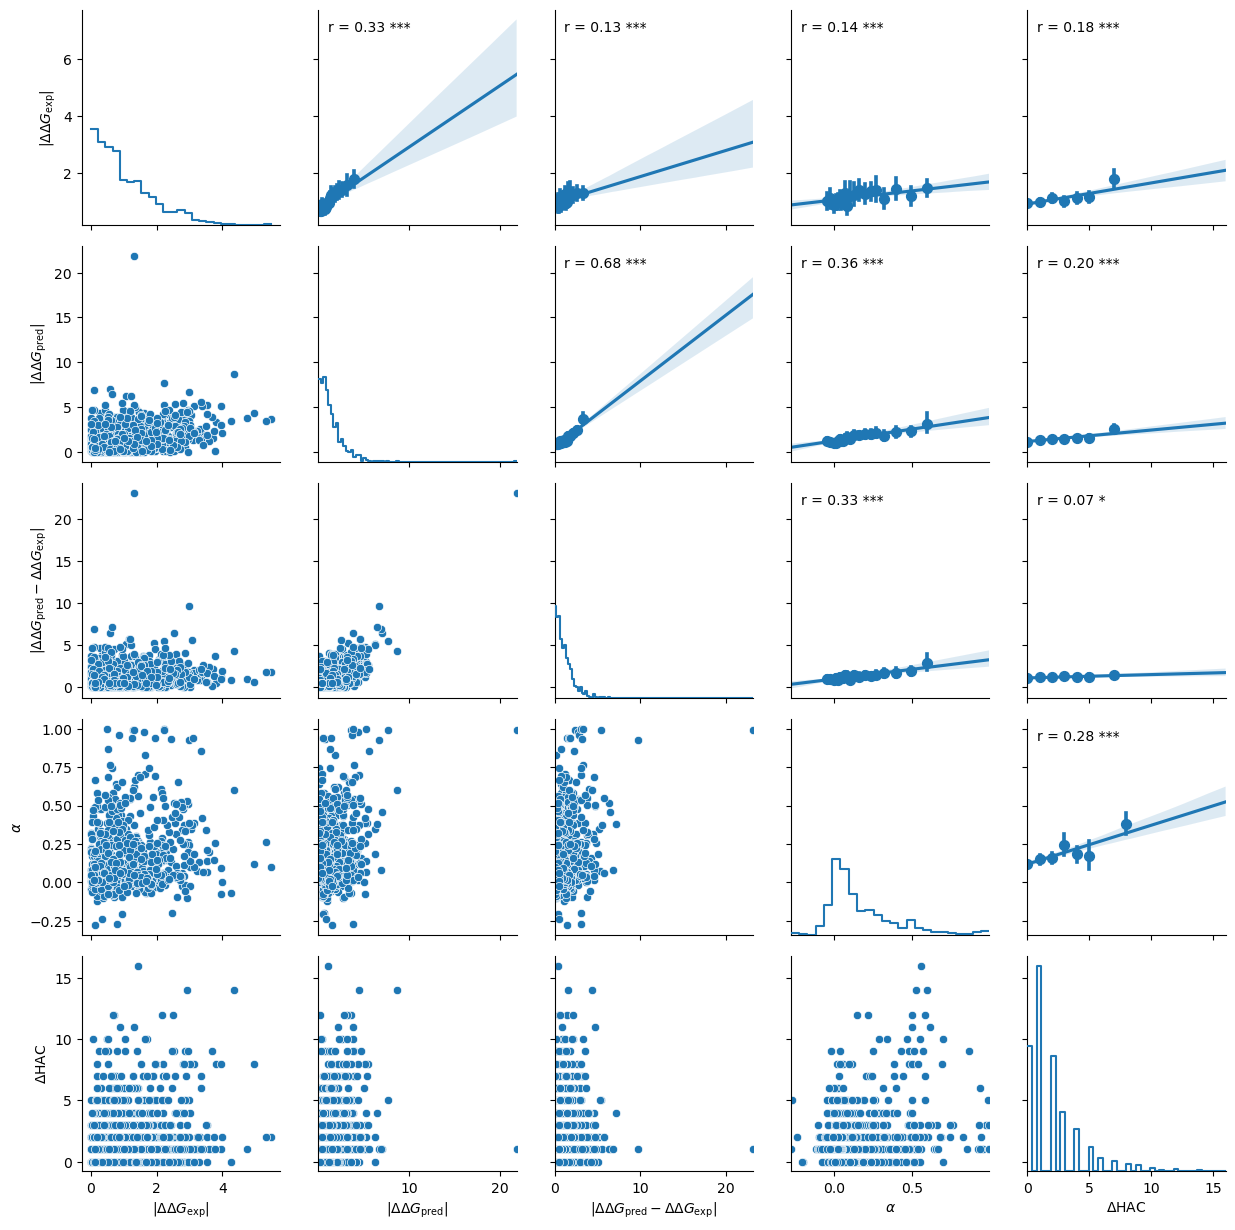

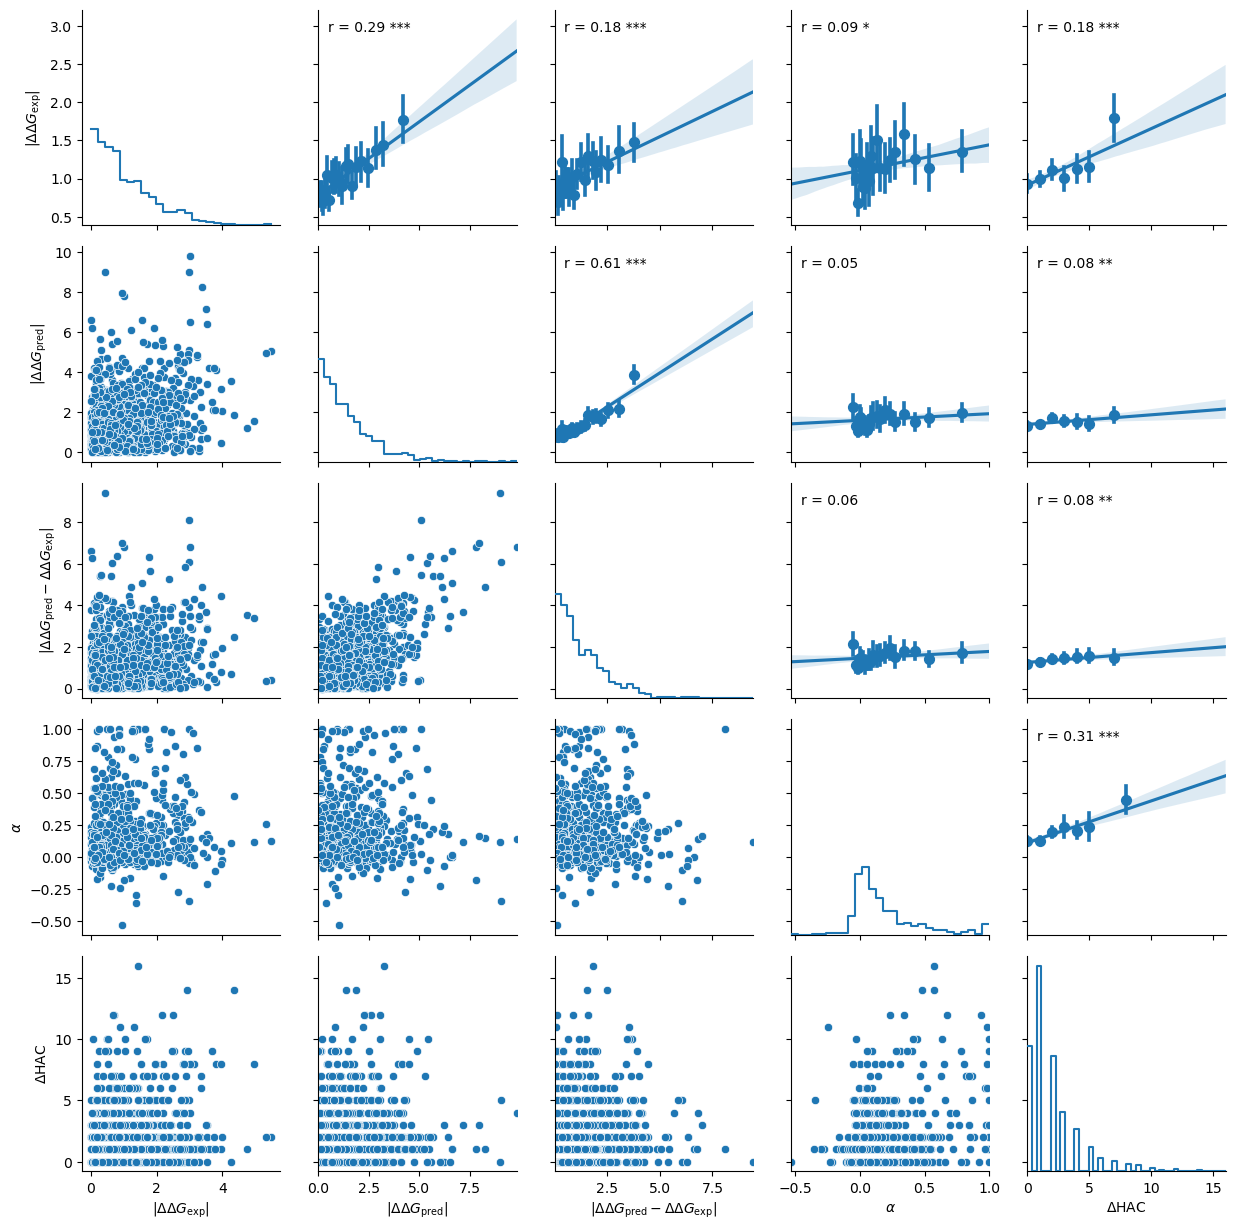

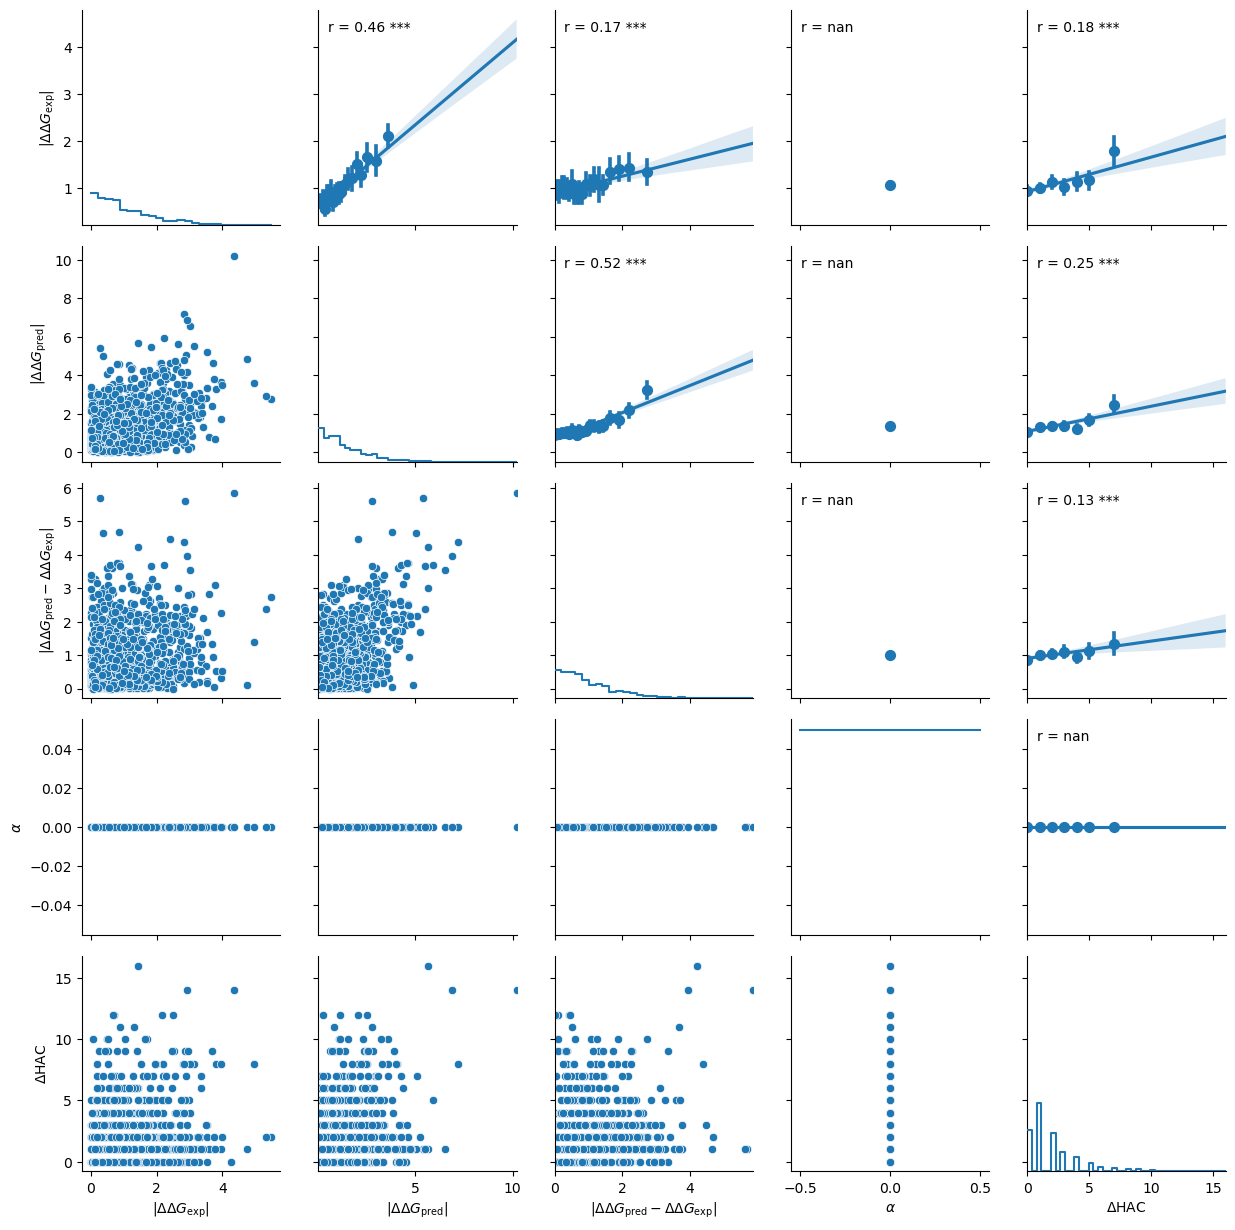

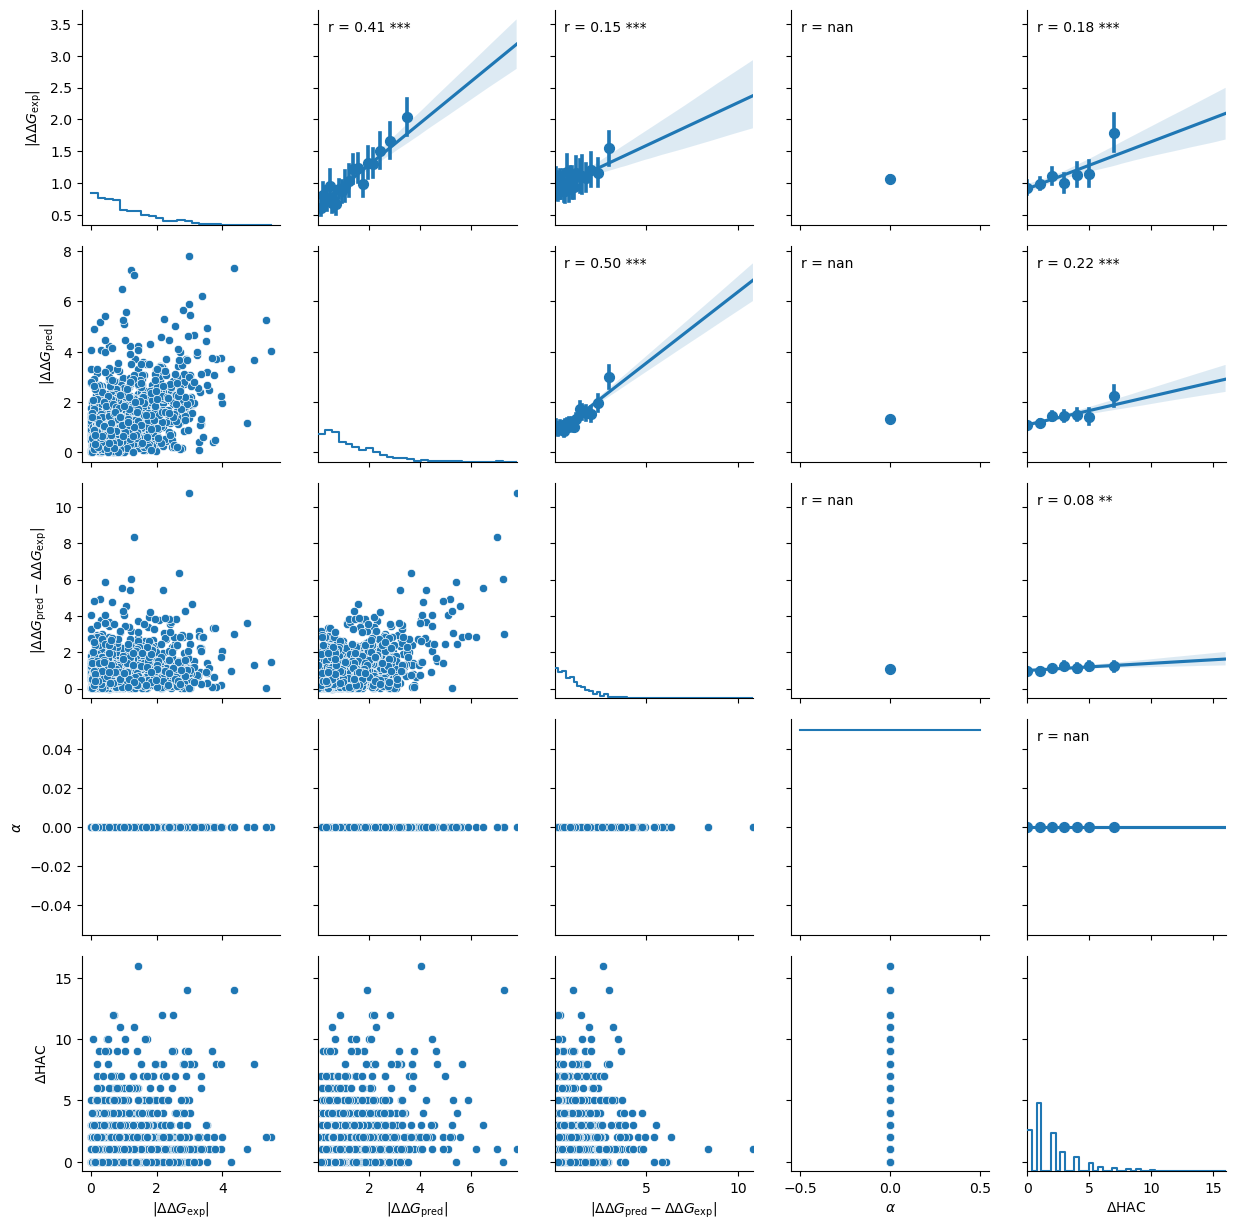

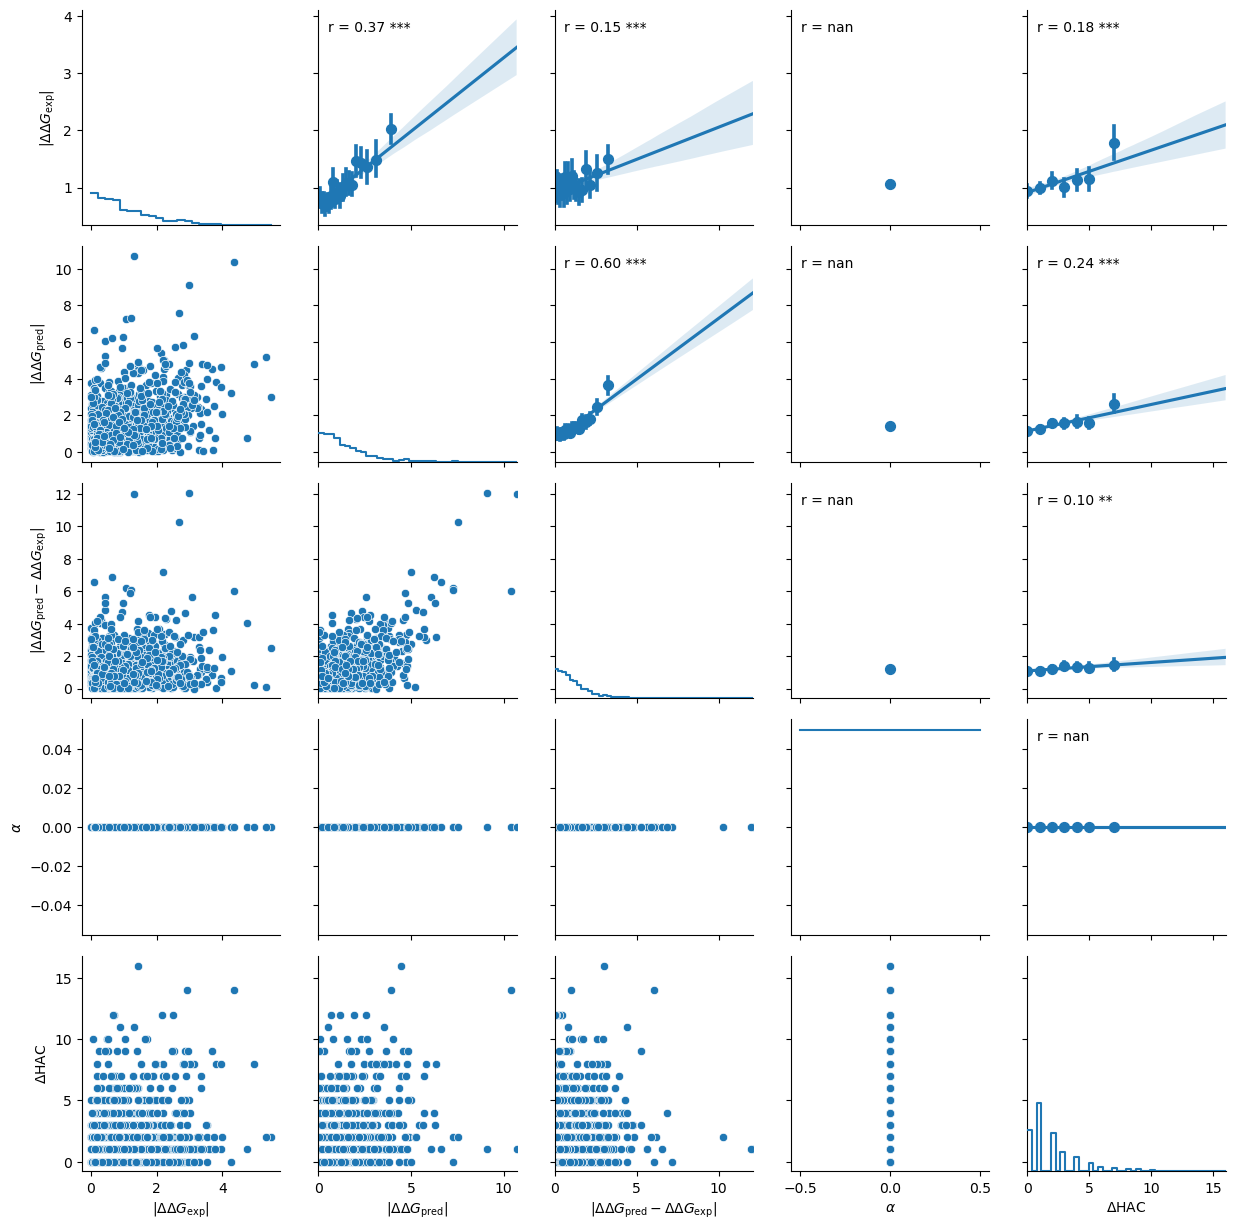

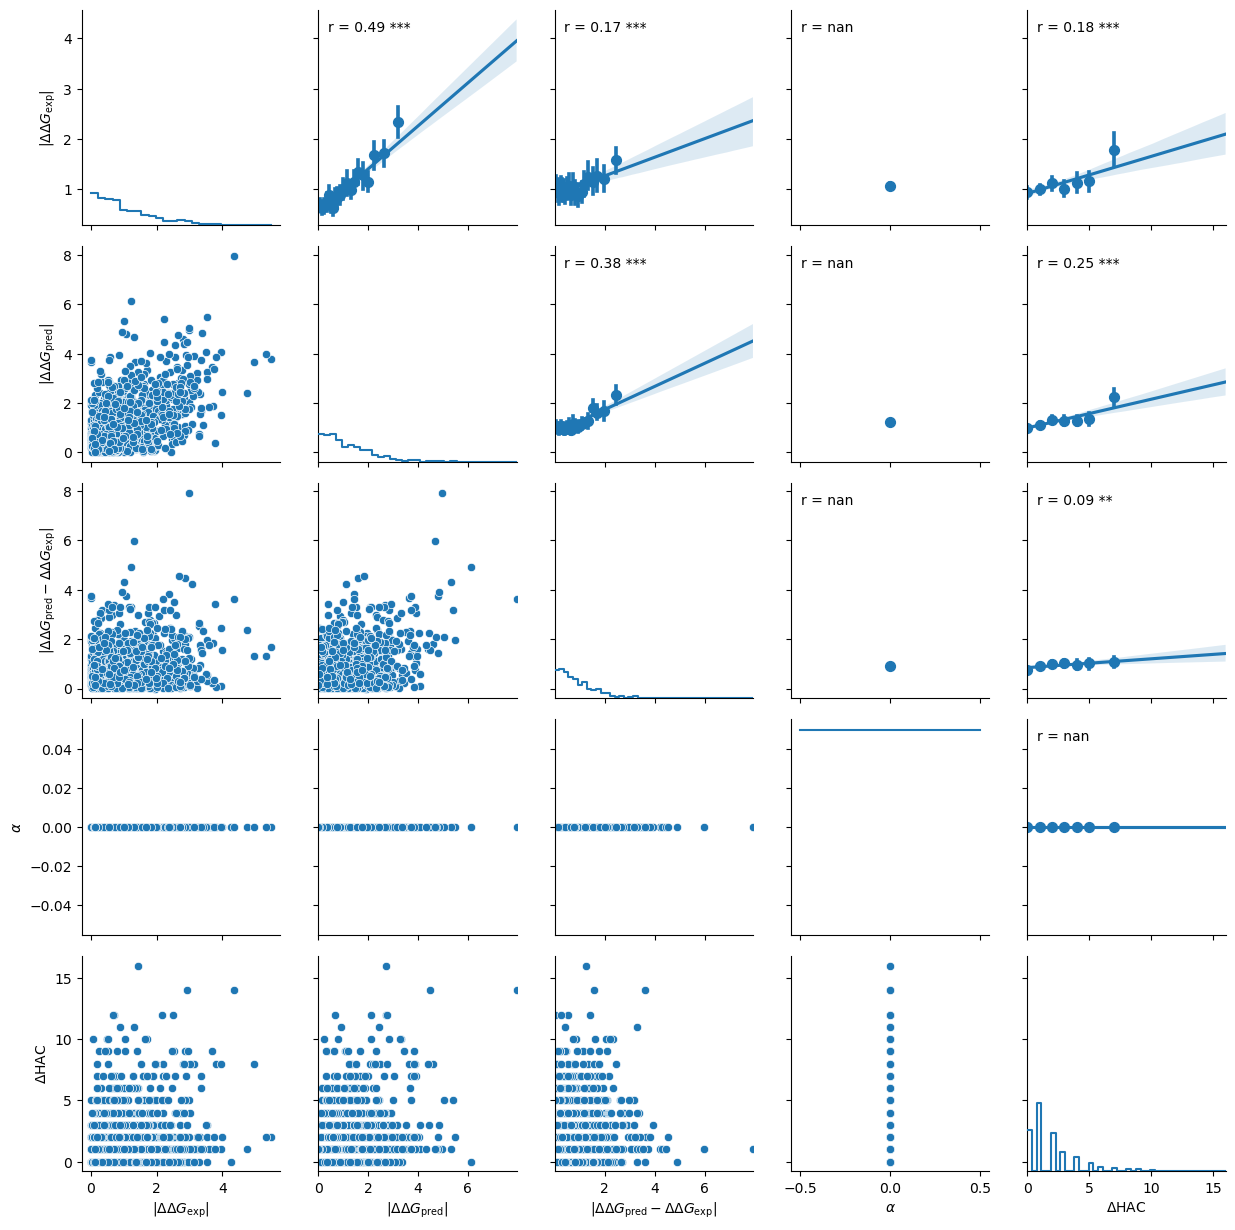

In [13]:
from scipy import stats
def corrfunc(x, y, **kws):
    nx, ny = [], []
    for xx, yy in zip(x, y):
        if not np.isnan(xx) and not np.isnan(yy):
            nx.append(xx)
            ny.append(yy)
    r, p = stats.pearsonr(nx, ny)        
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate('r = {:.2f} '.format(r) + p_stars,
    xy=(0.05, 0.9), xycoords=ax.transAxes)

for idx in ['OpenFF-1.0', 'OpenFF-2.0', 'GAFF2', 'cGenFF', 'OPLS3e', 'Consensus_OpenFF_GAFF2_cGenFF','Consensus_OpenFF_GAFF2', 'Consensus_all']:
    to_plot = all_edges.copy()
    for i, row in all_edges.iterrows():
        if row[f'DDG_Exp.'] < 0.0:
            to_plot.loc[i, "|DDG_Exp.|"] = -row["DDG_Exp."] 
        else:
            to_plot.loc[i, "|DDG_Exp.|"] = row["DDG_Exp."] 
        
        if row[f'DDG_{idx}'] < 0.0:
            to_plot.loc[i, "|DDG_Calc.|"] = -row[f"DDG_{idx}"]
        else:
            to_plot.loc[i, "|DDG_Calc.|"] = row[f"DDG_{idx}"] 
#     to_plot.loc[:, "DDG_Exp."] = to_plot["DDG_Exp."].apply(np.fabs)
#     to_plot.loc[:, "DDG_OpenFF-1.0"] = to_plot["DDG_OpenFF-1.0"].apply(np.fabs)
    g = sns.PairGrid(to_plot[["|DDG_Exp.|",
                "|DDG_Calc.|",
                f"abserror_{idx}",
                f"conv_{idx}",
                          "HvyAtoms",
                      #    "lomap"
                
               ]])
    g.map_upper(sns.regplot, x_bins=20)
    g.map_upper(corrfunc)
    g.map_diag(sns.histplot, element='step', fill=False)
    g.map_lower(sns.scatterplot)
    for i, label in enumerate(labels):
        g.axes[i, 0].yaxis.set_label_text(label)
        g.axes[-1, i].xaxis.set_label_text(label)
#     g.map_lower(corrfunc)
    plt.savefig(f"03i_pairgrid_{idx}.png", bbox_inches="tight", dpi=1200)

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/dhahn3/miniconda3/envs/off/lib/python3.7/site-

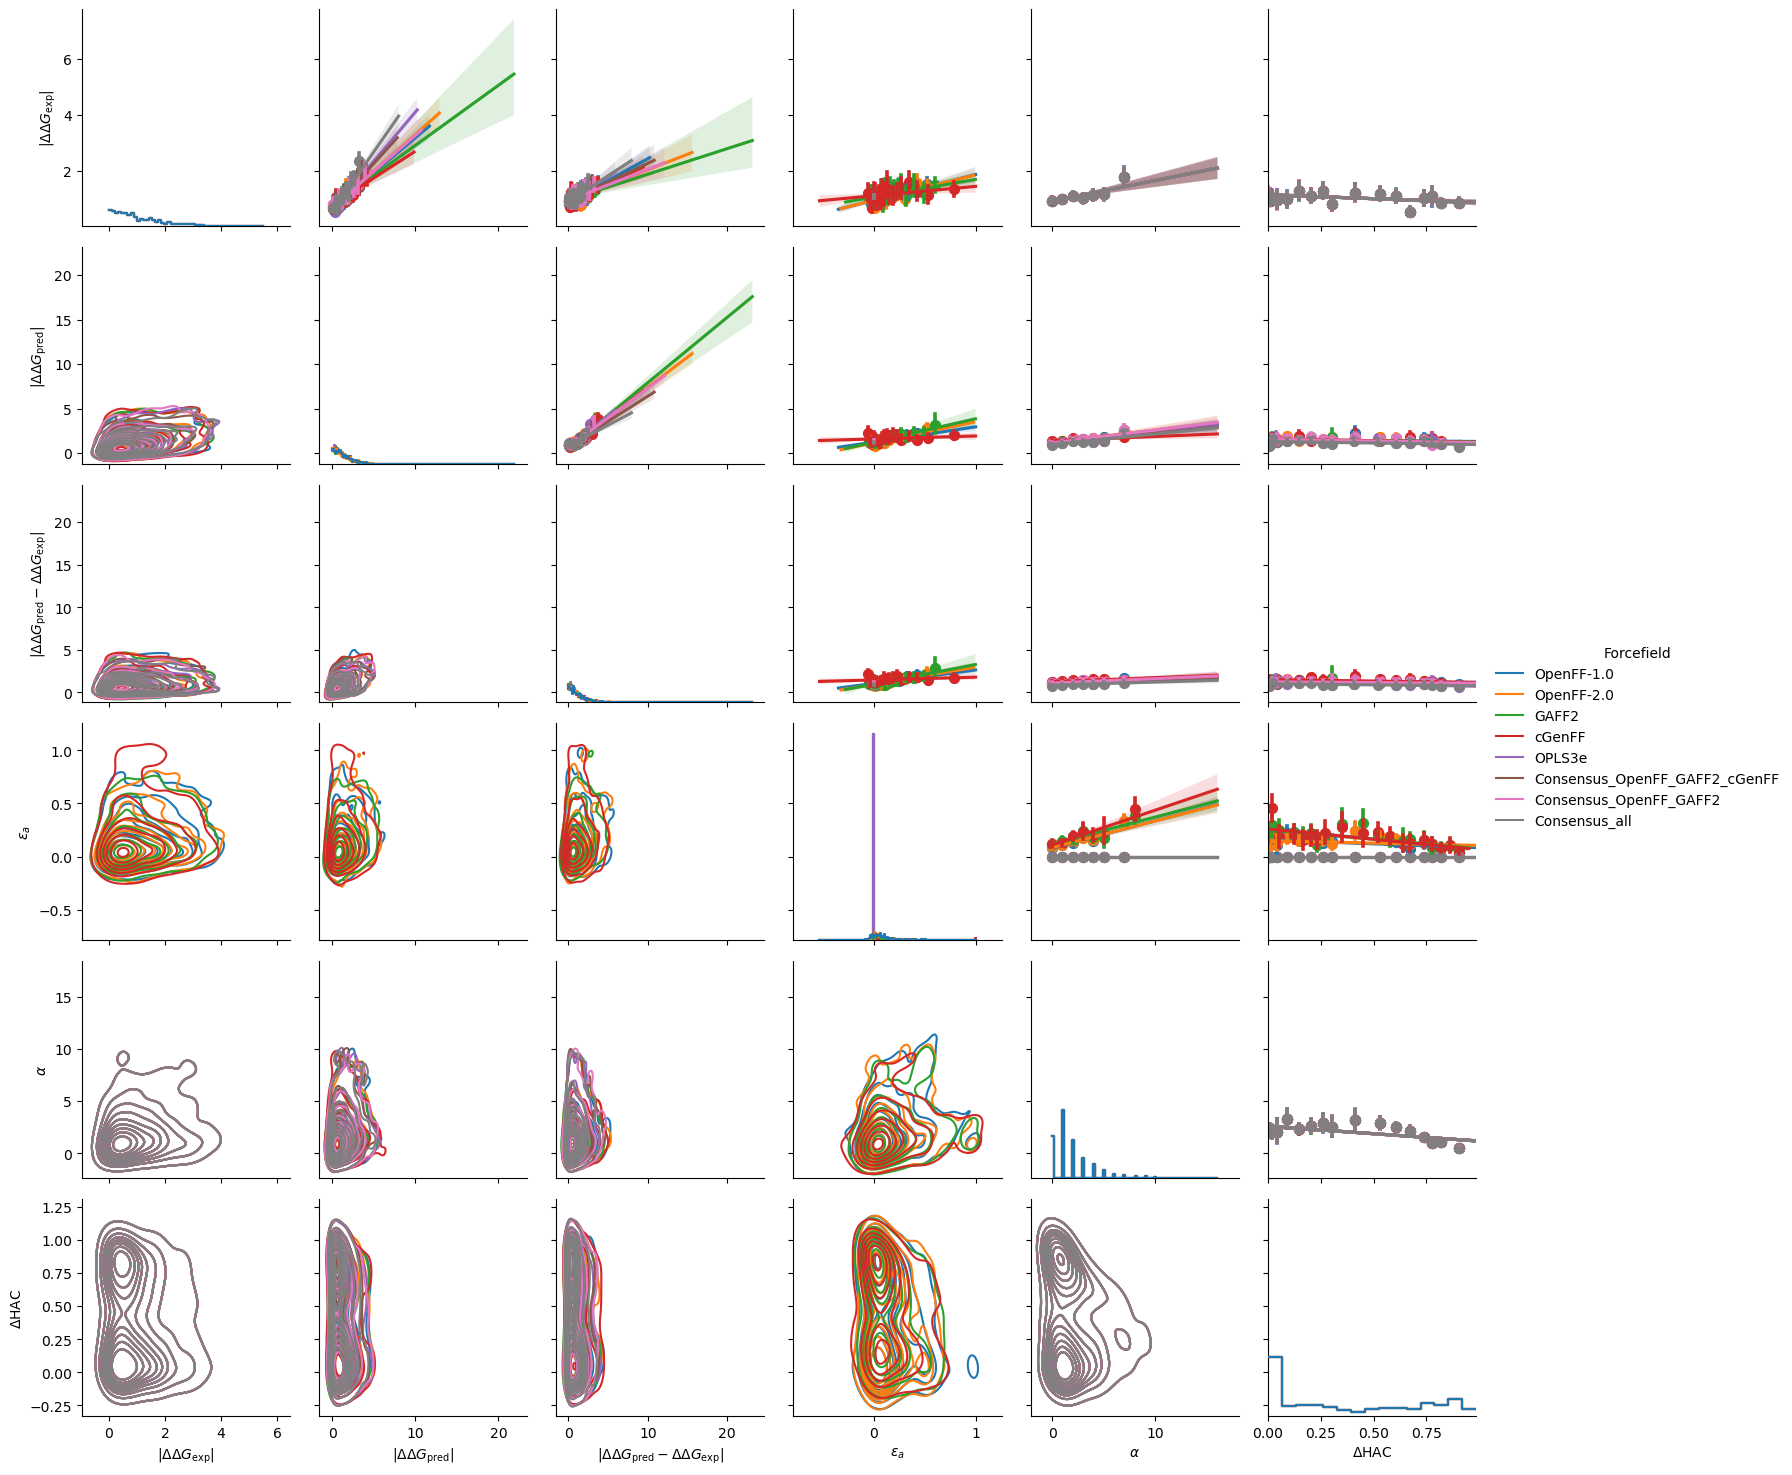

In [14]:
labels = [r'$|\Delta \Delta G_{\mathrm{exp}}|$',
          r'$|\Delta \Delta G_{\mathrm{pred}}|$',
          r'$|\Delta \Delta G_{\mathrm{pred}}-\Delta \Delta G_{\mathrm{exp}}|$',
          r'$\epsilon_{a}$',
          r'$\alpha$',
          r'$\Delta\mathrm{HAC}$'
         ]
g = sns.PairGrid(new_df, hue="Forcefield")
g.map_upper(sns.regplot, x_bins=20)
g.map_diag(sns.histplot, element='step', fill=False)
g.map_lower(sns.kdeplot)
g.add_legend()
for i, label in enumerate(labels):
    g.axes[i, 0].yaxis.set_label_text(label)
    g.axes[-1, i].xaxis.set_label_text(label)
plt.savefig("03i_pairgrid_all.png", bbox_inches="tight", dpi=1200)

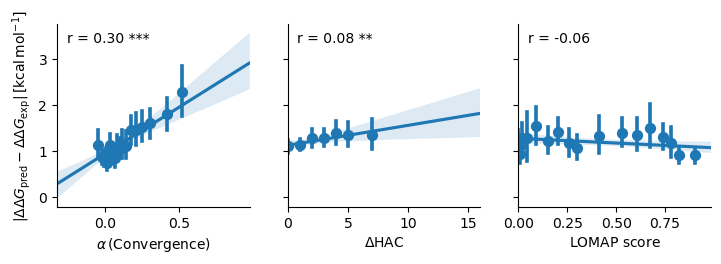

In [15]:
for idx in ['OpenFF-2.0']:
    to_plot = all_edges.copy()
    for i, row in all_edges.iterrows():
        if row[f'DDG_Exp.'] < 0.0:
            to_plot.loc[i, "|DDG_Exp.|"] = -row["DDG_Exp."] 
        else:
            to_plot.loc[i, "|DDG_Exp.|"] = row["DDG_Exp."] 
        
        if row[f'DDG_{idx}'] < 0.0:
            to_plot.loc[i, "|DDG_Calc.|"] = -row[f"DDG_{idx}"]
        else:
            to_plot.loc[i, "|DDG_Calc.|"] = row[f"DDG_{idx}"] 
    g = sns.PairGrid(to_plot[["|DDG_Exp.|",
                "|DDG_Calc.|",
                f"abserror_{idx}",
                f"conv_{idx}",
                          "HvyAtoms",
                          "lomap"
                
               ]],
                x_vars=[f"conv_{idx}",
                          "HvyAtoms",
                          "lomap"],
                y_vars=[f"abserror_{idx}"])
    g.map(sns.regplot, x_bins=20)
    g.map(corrfunc)
    g.axes[0, 0].yaxis.set_label_text(r'$|\Delta \Delta G_{\mathrm{pred}}-\Delta \Delta G_{\mathrm{exp}}|\,[\mathrm{kcal\,mol^{-1}}]$')
    g.axes[0, 0].xaxis.set_label_text(r'$\alpha\,(\mathrm{Convergence})$')
    g.axes[0, 1].xaxis.set_label_text(r'$\Delta\mathrm{HAC}$')
    g.axes[0, 2].xaxis.set_label_text(r'$\mathrm{LOMAP~score}$')
    plt.savefig("03i_pairgrid_openff2vsconv_hac_lomap.png", bbox_inches="tight", dpi=1200)